In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [7]:
DATA_PATH_APPSTORE = 'data/appleAppData.csv'
DATA_PATH_PLAYSTORE = 'data/Google-Playstore.csv'

df_as = pd.read_csv(DATA_PATH_APPSTORE)
df_ps = pd.read_csv(DATA_PATH_PLAYSTORE)

### Introduction
As part of our visualization, we would like to focus on a comparison between Google Play store apps and Appstore apps, especially from the point of view of rating and app's business model (adds, in-game purchases, app cost).

In [8]:
print(f'Appstore table length: {len(df_as)}\n')
print(f'Appstore table columns and their types:\n{df_as.dtypes}\n')
print(f'Playstore table length: {len(df_ps)}\n')
print(f'Playstore table columns and their types:\n{df_ps.dtypes}\n')

Appstore table length: 1230376

Appstore table columns and their types:
App_Id                      object
App_Name                    object
AppStore_Url                object
Primary_Genre               object
Content_Rating              object
Size_Bytes                 float64
Required_IOS_Version        object
Released                    object
Updated                     object
Version                     object
Price                      float64
Currency                    object
Free                          bool
DeveloperId                  int64
Developer                   object
Developer_Url               object
Developer_Website           object
Average_User_Rating        float64
Reviews                      int64
Current_Version_Score      float64
Current_Version_Reviews      int64
dtype: object

Playstore table length: 2312944

Playstore table columns and their types:
App Name              object
App Id                object
Category              object
Rating           

#### Reviews

We expect the majority of apps in both stores to have very few reviews. It is actually the case, in both tables, most of the apps have less then 10 reviews. But what is the percentage of apps with at least MIN_REVIEWS reviews for both stores?

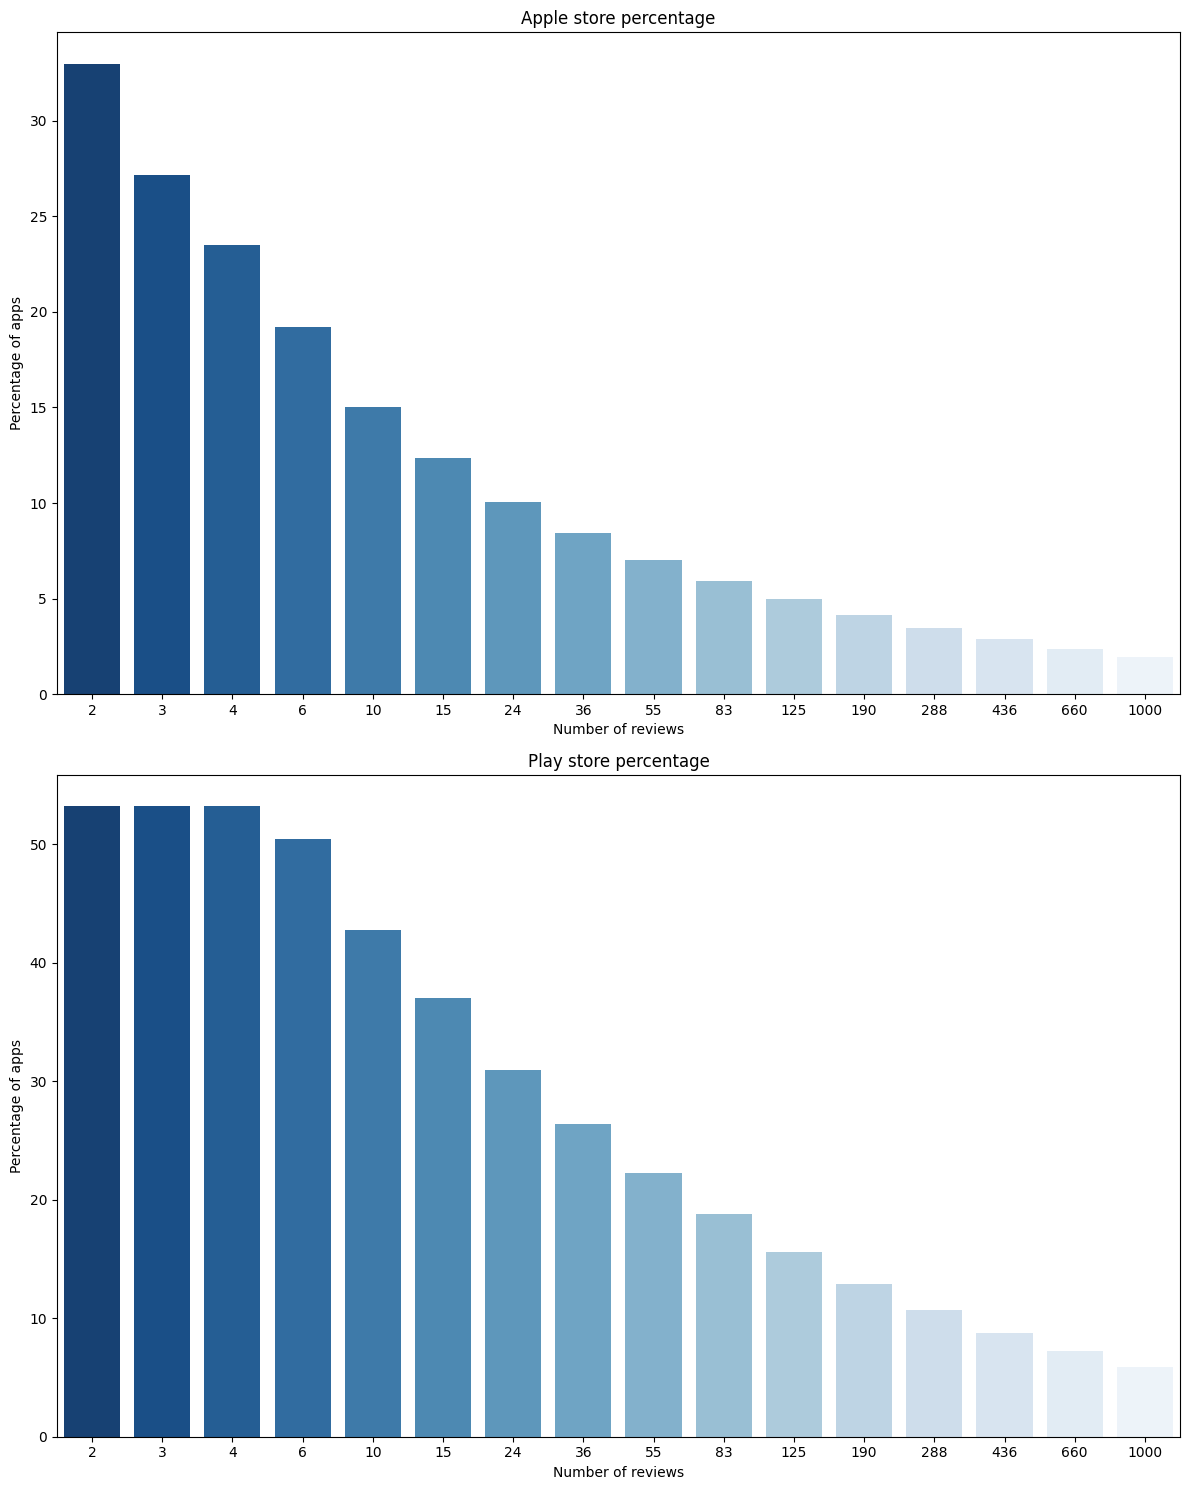

In [38]:
min_reviews_arr = np.geomspace(2, 1000, 16).astype(int)
fig, axs = plt.subplots(nrows=2, figsize=(12, 15))

percentages_as = [100 * len(df_as[df_as["Reviews"] >= min_reviews]) /
                   len(df_as) for min_reviews in min_reviews_arr]
percentages_ps = [100 * len(df_ps[df_ps["Rating Count"] >= min_reviews]) /
                   len(df_ps) for min_reviews in min_reviews_arr]

xticks = np.arange(1, len(min_reviews_arr) + 1)
sns.barplot(x=min_reviews_arr, y=percentages_as, palette='Blues_r', ax=axs[0])
axs[0].set(title='Apple store percentage', xlabel='Number of reviews', ylabel='Percentage of apps')
sns.barplot(x=min_reviews_arr, y=percentages_ps, palette='Blues_r', ax=axs[1])
axs[1].set(title='Play store percentage', xlabel='Number of reviews', ylabel='Percentage of apps')

fig.tight_layout()

We already have some interesting results about the difference in the profile of apps in both stores. Whereas only about 15 percent of apps on the App Store have at least 10 reviews, on the Play Store that number is about 44 percent.

Let's focus only on apps from both stores that have at least 50 reviews. That would give us more meaningful information about the average review they get.

In [40]:
MIN_REVIEWS = 50

df_as_popular = df_as[df_as['Reviews'] >= MIN_REVIEWS]
df_ps_popular = df_ps[df_ps['Rating Count'] >= MIN_REVIEWS]

print(f'We are left with {len(df_as_popular)} popular appstore apps, which is about \
{int(100 * len(df_as_popular) / len(df_as))} percent of all recorded appstore apps')
print(f'We are left with {len(df_ps_popular)} popular playstore apps, which is about \
{int(100 * len(df_ps_popular) / len(df_ps))} percent of all recorded playstore apps')

We are left with 90241 popular app store apps, which is about 7 percent of all recorded app store apps
We are left with 535561 popular  play store apps, which is about 23 percent of all recorded play store apps


Let's inspect reviews' score distribution among those popular apps.

Mean rating among popular app store apps: 4.310006613512705
Median rating among popular app store apps: 4.53846
Mean rating among popular play store apps: 4.03573113053415
Median rating among popular play store apps: 4.2


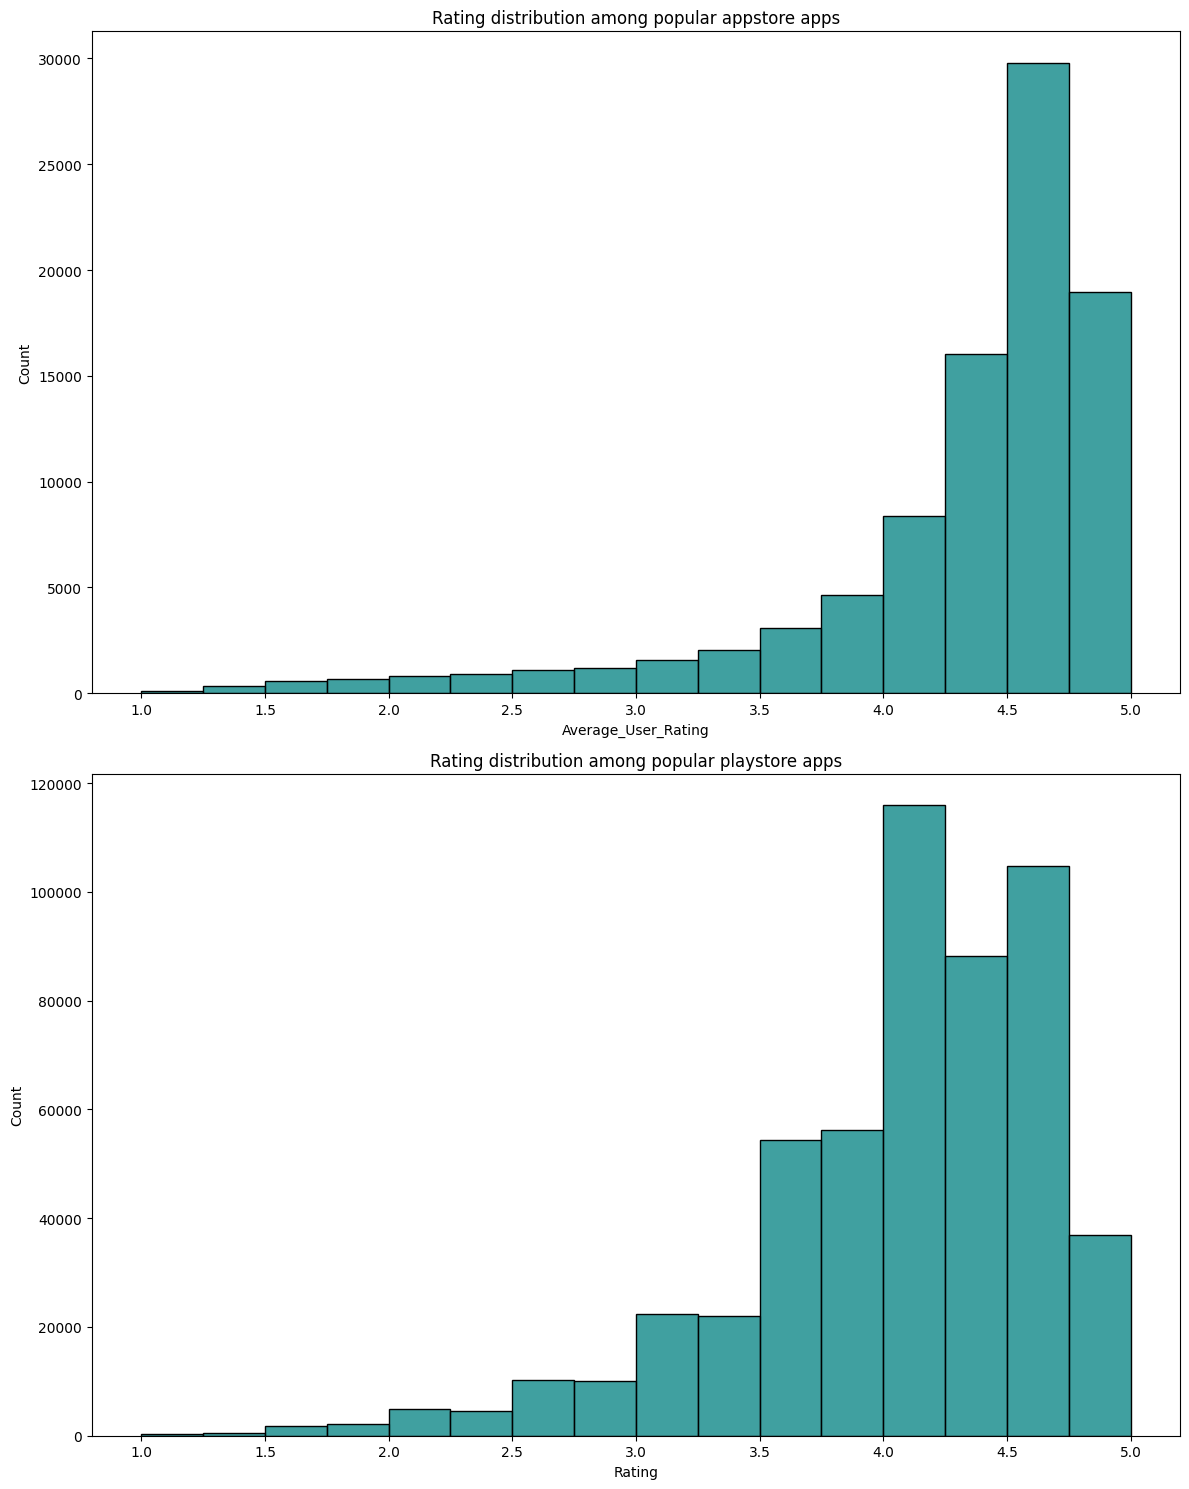

In [49]:
fig, axs = plt.subplots(nrows=2, figsize=(12, 15))
nbins = 16

print(f'Mean rating among popular appstore apps: {np.mean(df_as_popular["Average_User_Rating"])}')
print(f'Median rating among popular appstore apps: {np.median(df_as_popular["Average_User_Rating"])}')
print(f'Mean rating among popular playstore apps: {np.mean(df_ps_popular["Rating"])}')
print(f'Median rating among popular playstore apps: {np.median(df_ps_popular["Rating"])}')

sns.histplot(data=df_as_popular['Average_User_Rating'], bins=nbins, ax=axs[0], color='teal')
axs[0].set(title='Rating distribution among popular appstore apps')
sns.histplot(data=df_ps_popular['Rating'], bins=nbins, ax=axs[1], color='teal')
axs[1].set(title='Rating distribution among popular playstore apps')

fig.tight_layout()

### Installs

Another definition of popularity and the potential difference between the two stores is the percentage of apps that were downloaded at least MIN_INSTALLS times. Unfortunately, we have this data available only for Play Store apps.

### Popular apps characteristics

For play store apps we can inspect what typical characteristics they have (again, most of this data is not present for app store apps)

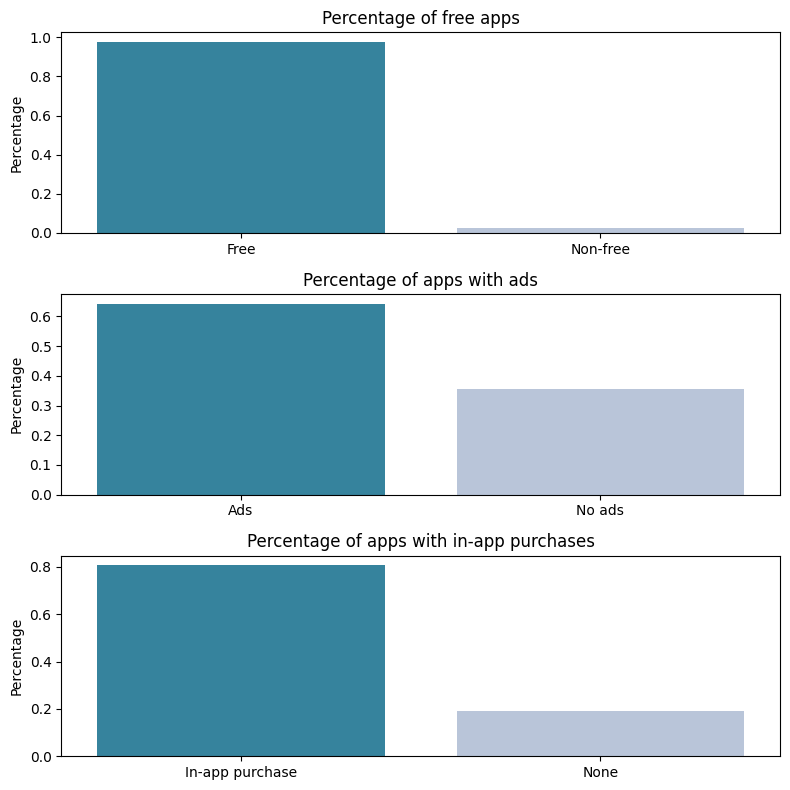

In [67]:
fig, axs = plt.subplots(nrows=3, figsize=(8,8))

sns.barplot(x=['Free', 'Non-free'], y=df_ps_popular['Free'].value_counts(normalize=True), ax=axs[0], palette='PuBuGn_r')
axs[0].set(title='Percentage of free apps', ylabel='Percentage')

sns.barplot(x=['Ads', 'No ads'], y=df_ps_popular['Ad Supported'].value_counts(normalize=True), ax=axs[1], palette='PuBuGn_r')
axs[1].set(title='Percentage of apps with ads', ylabel='Percentage')

sns.barplot(x=['In-app purchase', 'None'], y=df_ps_popular['In App Purchases'].value_counts(normalize=True), ax=axs[2], palette='PuBuGn_r')
axs[2].set(title='Percentage of apps with in-app purchases', ylabel='Percentage')

fig.tight_layout()